In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sintetik 2D

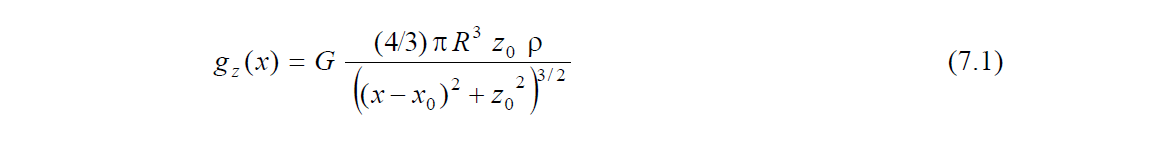

In [2]:
G_konstanta = 6.67e-11 # SI (m^3 kg^-1 s^-2)

# parameter model sintetik
x0 = 100 # m
z0 = 150 # m
R = 100 # m
rho = 2000 # kg/m^3

# variabel bebas x
x = np.arange(0,1001,20)

In [3]:
# fungsi forward modellling bola homogen
def fungsi_gz(x0, z0, R, rho):
    gz = G_konstanta*((4/3)*np.pi*(R**3)*z0*rho)/(((x-x0)**2 + z0**2)**(3/2)) # 1 mGal = m/s^2
    return gz

In [4]:
# menghitung data untuk bola 1
gz1 = fungsi_gz(x0,z0,R,rho)

# menghitung data untuk bola 2
gz2 = fungsi_gz(300,200,100,9000)

# menghitung data untuk bola 3
gz3 = fungsi_gz(650,100,100,2000)

# menghitung data untuk bola 4
gz4 = fungsi_gz(950,200,100,5000)

# menghitung gz total
gz_total = gz1+gz2+gz3+gz4

# menambahkan noise
rng = np.random.default_rng(seed=11)
noise = rng.uniform(-0.25e-5, 0.25e-5, len(gz_total))

gz_with_noise = gz_total+noise

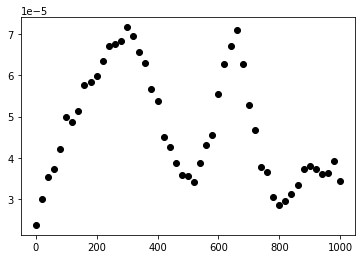

In [5]:
plt.plot(x, gz_with_noise, 'ko')
plt.show()

In [6]:
# fungsi lingkaran
def lingkaran(x0,z0,R):
    q = np.linspace(0, 2*np.pi, 1000)
    
    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)-z0
    
    return xSphere,zSphere

xb1,yb1 = lingkaran(x0,z0,R)
xb2,yb2 = lingkaran(300,200,R)
xb3,yb3 = lingkaran(650,100,R)
xb4,yb4 = lingkaran(950,200,R)

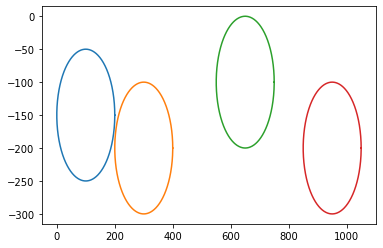

In [7]:
plt.plot(xb1,yb1)
plt.plot(xb2,yb2)
plt.plot(xb3,yb3)
plt.plot(xb4,yb4)

plt.show()

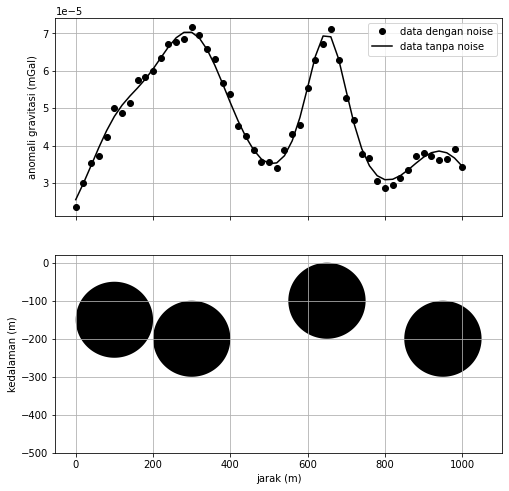

In [8]:
# plotting
fig,(ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))

# ax1
ax1.plot(x, gz_with_noise, 'ko', label="data dengan noise")
ax1.plot(x, gz_total, 'k-', label="data tanpa noise")
ax1.set_ylabel("anomali gravitasi (mGal)")
ax1.grid()
ax1.legend()

# ax2
ax2.fill(xb1,yb1,'k')
ax2.fill(xb2,yb2,'k')
ax2.fill(xb3,yb3,'k')
ax2.fill(xb4,yb4,'k')
ax2.set_ylim(-500,20)
ax2.grid()
ax2.set_ylabel("kedalaman (m)")
ax2.set_xlabel("jarak (m)")
plt.show()

# Sintetik 3D

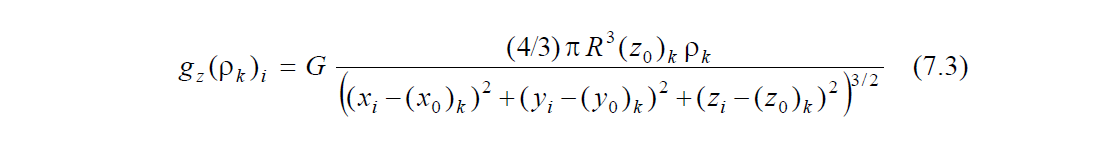

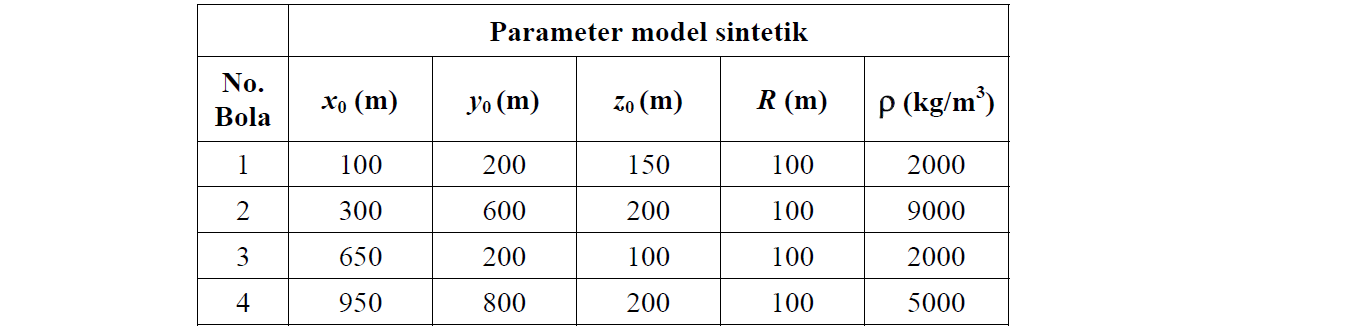

In [9]:
xi = np.arange(0,1001,20)
yi = np.arange(0,1001,20)
zi = np.array([0 for i in range(0,1001,20)])

def fungsi_gz3d(x0,y0,z0,R,rho):
    Xi, Yi = np.meshgrid(xi,yi)
    
    gz3d = G_konstanta*(((4/3)*np.pi*(R**3)*(z0)*rho)/((Xi-x0)**2 + (Yi-y0)**2 + (zi-z0)**2)**(3/2))
    return Xi,Yi,gz3d

x1,y1,gz3d1 = fungsi_gz3d(100,200,150,100,2000)
x2,y2,gz3d2 = fungsi_gz3d(300,600,200,100,9000)
x3,y3,gz3d3 = fungsi_gz3d(650,200,100,100,2000)
x4,y4,gz3d4 = fungsi_gz3d(950,800,200,100,5000)

gz3d_total = gz3d1+gz3d2+gz3d3+gz3d4

# menambahkan noise
gz3d_with_noise = gz3d_total + noise

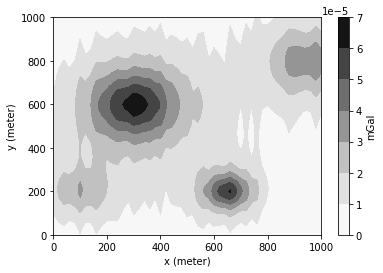

In [10]:
plt.contourf(x1,y1,gz3d_with_noise,cmap="Greys")
plt.ylabel("y (meter)")
plt.xlabel("x (meter)")
plt.colorbar(label="mGal")
plt.show()

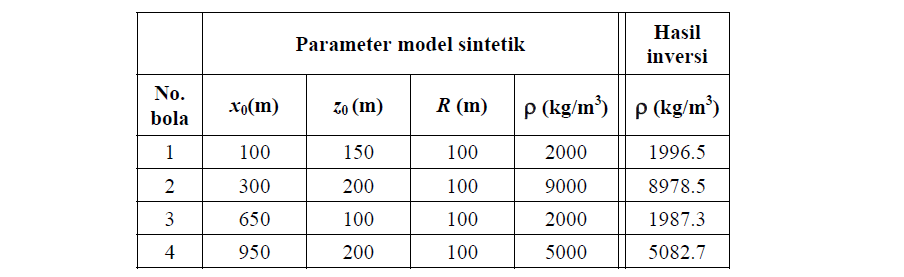

In [11]:
# fungsi forward modellling bola homogen
def kernel(x0, z0, R, xx):
    return G_konstanta*((4/3)*np.pi*(R**3)*z0)/(((xx-x0)**2 + z0**2)**(3/2)) # 1 mGal = m/s^2

# variabel
x0 = [100, 300, 650, 950] # meter
z0 = [150, 200, 100, 200] # meter
R = 100 # meter

In [12]:
G = np.zeros((len(x), 4))

for i in range(4):
    for j in range(len(x)):
        G[j,i] = kernel(x0[i], z0[i], R, x[j])

In [13]:
# inversi
m_calc = np.linalg.inv((G.T).dot(G)).dot(G.T).dot(gz_with_noise)
m_calc

array([1927.38031135, 9088.05680044, 1979.69646185, 4956.4200855 ])

In [14]:
Error_i = (G.dot(m_calc)) - gz_with_noise
Error_i2 = Error_i**2
MSE = (1/len(x))*np.sum(Error_i2)
RMSE = np.sqrt(MSE)
RMSE

1.4327466463161363e-06

In [16]:
e = np.sqrt(np.sum(((G.dot(m_calc)) - gz_with_noise)**2)/len(x))
e

1.4327466463161363e-06